<a href="https://colab.research.google.com/github/sarthakb202005/Quantum-Ising-model/blob/main/Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.2 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

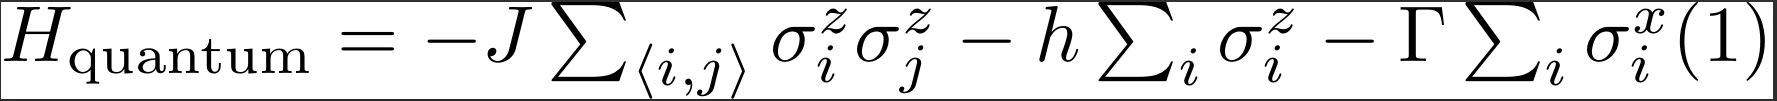

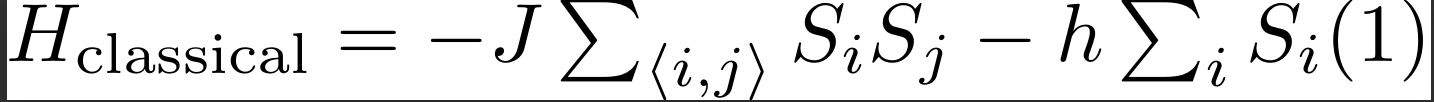

In [ ]:
ETA=0.5
Ising=qml.Hamiltonian(
    [1,1,1,1,ETA,ETA,ETA],
[
qml.PauliX(0) @ qml.PauliX(1),
qml.PauliY(0) @ qml.PauliY(1),
qml.PauliX(1) @ qml.PauliX(2),
qml.PauliY(1) @ qml.PauliY(2),
qml.PauliZ(0),
qml.PauliZ(1),
qml.PauliZ(2),
]
)
#the last three coefficients/terms represent the magnetic field effects in the z direction for each of the qubits.
#The first 4 terms represent the tensor product between the pauli matrices acting respective qubits.

H=(PauliX(0) ⊗ PauliX(1))+(PauliY(0) ⊗ PauliY(1))+(PauliX(1) ⊗ PauliX(2))+(PauliY(1) ⊗
PauliY(2))
+
0.5
⋅
PauliZ
(
0
)
+
0.5
⋅
PauliZ
(
1
)
+
0.5
⋅
PauliZ
(
2
)
+0.5⋅PauliZ(0)+0.5⋅PauliZ(1)+0.5⋅PauliZ(2)


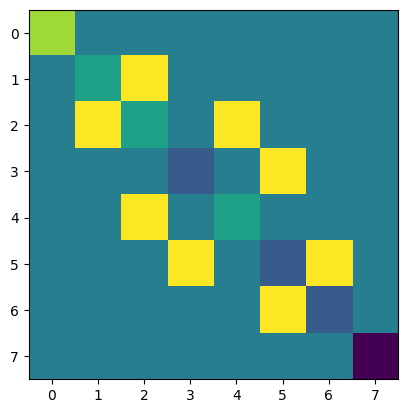

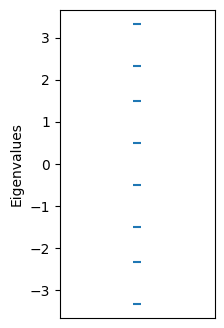

ground state energy : -3.328


In [ ]:
plt.imshow(qml.matrix(Ising).real)#converts the hamiltonian into matrix, and we have visualisation of only real part, that is our part of interest.
plt.savefig("ising")#saves the file
plt.show()#imshow converts that matrix into an image

e,v=np.linalg.eigh(qml.matrix(Ising)) #calculates eigenvalues(e) and eigenvectors(v)
fig=plt.figure(figsize=(2,4))
plt.scatter([0]*len(e), e, marker="_")#e is the list of eigen values and the len(e) gives the lenght of eigen values.
#[0]*len(e) creates a list of zeroes , where the length of list is equal to the no.of eigen values.
#eigen values are visualized on the y axis.
#"_“ (underscore) is a marker that draws a horizontal line at each data point

plt.xticks([])#hides x ticks labels.
plt.ylabel('Eigenvalues')
plt.show()

print(f"ground state energy : {min(e): .3f}") #finds minimum eigen value which corresponds to the ground state energy.
#f formats the value to 3 decimal places.



The first image represents 8*8 matrix, which related to a system of 3 qubits.
COLOR REFERNECE.
Yellow: Represents positive values.

Blue: Represents negative values.

Green/Teal: Represents intermediate positive values.

Purple/Deep Blue: Represents large negative values.

Dark Green/Teal: Represents intermediate values that are close to zero.

Dark Blue/Teal: Represents values that are slightly negative or positive but close to zero.

THE DIAGONAL ELEMENTS FROM (0,0) TO (7,7) REPRESENT THE EIGEN VALUES OF THE HAMILTONIAN AND CAN INDICATE THE ENERGY LEVELS OF THE SYSTEM.

THE OFF DIAGONAL ELEMENTS REPRESENT INTERACTIONS BETWEEN DIFFERENT STATES. THEY MIGHT ALSO INDICATE THE STRENGTH OF THESE INTERACTIONS(J)


Image 2 suggests the range of the eigen values from 3.5 to -3.5 and indicates the presence of both positive and negative values.
The exact x coordinate is irrelevant as the single tick represents eigen value on the y axis.

In [ ]:
NLAYERS=1
shapes=qml.SimplifiedTwoDesign.shape(NLAYERS,1)

<Figure size 640x480 with 0 Axes>

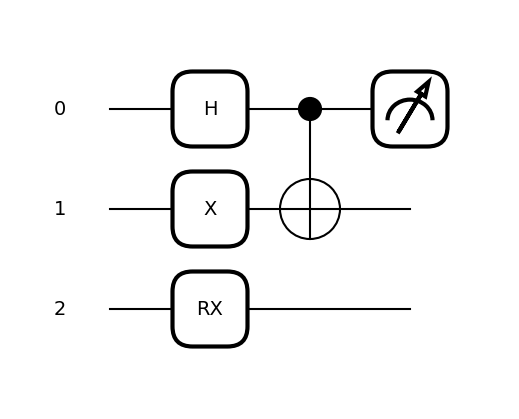

In [ ]:
@qml.qnode(qml.device("default.qubit", wires =3))#represents quantum circuit
def ckt(param1, param2): #2 parameters used to apply rotation and the entangled gates in the qcircuit

  qml.SimplifiedTwoDesign(param1,param2, wires=range(1))#circuit constructioni and gates applied on 3 qubits
  qml.Hadamard(wires=0)
  qml.PauliX(wires=1)
  qml.CNOT(wires=[0,1])
  qml.RX(param1, wires=2)
  return qml.expval(qml.PauliZ(0))

  return qml.expval(op=Ising)#this gives the expectation value , it is the value of the average hamiltonian expected  after the circuit is applied


fig=plt.figure()
qml.draw_mpl(ckt, expansion_strategy="device")( #speicifies how the circuit will be expanded and the device explains the circuit is being expanded acc to the rules of quantum device
                                               #being used.
    np.random.random(shapes[0]) ,np.random.random(shapes[1])
)#these generate random arrays of parameters that match the shape required by the template (simplifiedtwodesign shape)

plt.savefig("quantum circuit.png")
plt.show()



This code is for removing the default rotational gates.

<Figure size 640x480 with 0 Axes>

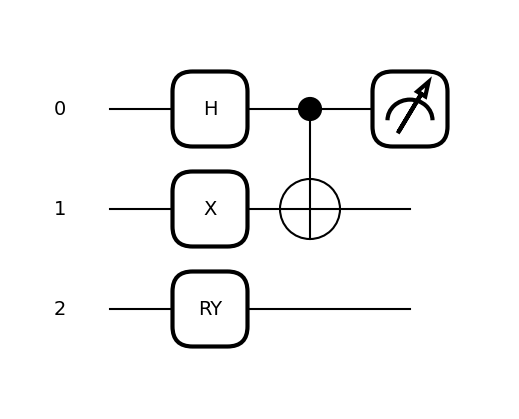

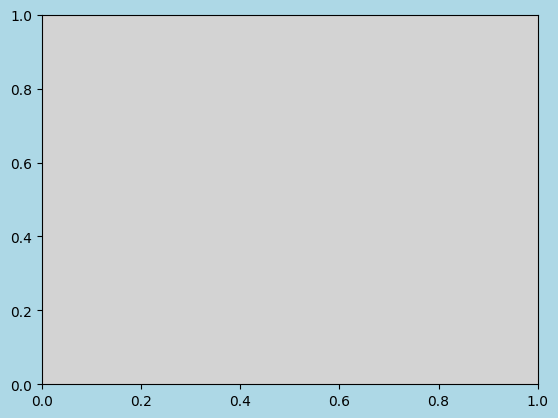

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define the quantum device
dev = qml.device("default.qubit", wires=3)

# Define the quantum circuit
@qml.qnode(dev)
def ckt(param1, param2):
    # Apply gates manually, avoiding default RY gate
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(param2, wires=2)
    # Apply other gates as needed


    return qml.expval(qml.PauliZ(0))  # Expectation value of Pauli-Z measurement on qubit 0

# Plot the quantum circuit
fig = plt.figure()
qml.draw_mpl(ckt, expansion_strategy="device")(
    np.random.random(shapes[0]), np.random.random(shapes[1])

)
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')  # Example color for the axes background
fig.patch.set_facecolor('lightblue')  # Example color for the figure background
plt.savefig("quantum_circuit.png")
plt.show()